# Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments,and the progression of disease epidemics.

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12]], dtype=int64),
 array([  20000,   30000,   45000,   50000,   60000,   80000,  110000,
         150000,  200000,  300000,  500000, 1000000], dtype=int64))

In [4]:
dataset.head()

,Position,Level,Salary
0,Swiper,1,20000
1,Peion,2,30000
2,Business Analyst,3,45000
3,Junior Consultant,4,50000
4,Senior Consultant,5,60000


What are the features?
- **level:** what is the postion of the employee
- **Salary:** amount given to the emplotyee

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_test,X_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(array([[ 7],
        [12],
        [ 5],
        [11],
        [ 3],
        [ 9]], dtype=int64), array([[ 2],
        [ 8],
        [10],
        [ 4],
        [ 1],
        [ 6]], dtype=int64))

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_test)
print(X_train)

[[-0.26171196]
 [ 1.30855981]
 [-0.88982067]
 [ 0.99450545]
 [-1.51792938]
 [ 0.36639675]]
[[-0.99450545]
 [ 0.88982067]
 [ 1.51792938]
 [-0.36639675]
 [-1.30855981]
 [ 0.26171196]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


- **  using sklearn.preprocessing to import standard scalar **
Standardize features by removing the mean and scaling to unit variance.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Methods in Linear Regression 

1.fit(X, y[, sample_weight]) :	Fit linear model.

2.predict(X)	             :  Predict using the linear model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) 

- ** using sklearn.preprocessing to import polynomialfeature **

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

## Prediction on Test set

In [8]:
X_test_poly = poly_reg.fit_transform(X_test)
print(type(X_test_poly))
print(type(y_test))
poly_reg.fit(X_test_poly, y_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_test_poly, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Methods in polynomial feature:- 

1.fit(X[, y])	          : Compute number of output features.

2.fit_transform(X[, y]) :	Fit to data, then transform it.

### Import matplotlib.pyplot for plotting graphs - 


1) plt.plot    :Plot lines and /or markers to the Axes. args is a variable length argument, allowing for multiple x, y pairs                     with an optional format string.

2) plt.scatter :Make a scatter plot of x vs y.Marker size is scaled by s and marker color is mapped to c.

## Visualising the Linear Regression results

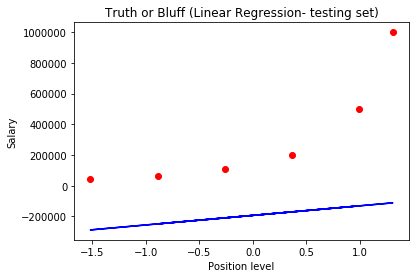

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color = 'blue')
plt.title('Truth or Bluff (Linear Regression- testing set)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results

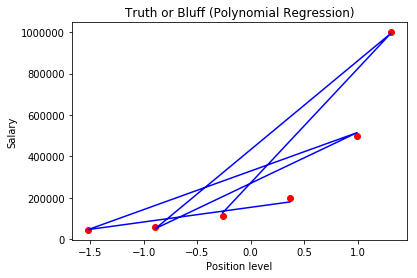

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lin_reg_2.predict(poly_reg.fit_transform(X_test)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

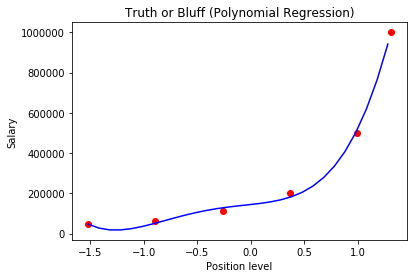

In [11]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


- **  reshape **
numpy.reshape(a, newshape, order='C')
Gives a new shape to an array without changing its data.

- ** arange **
numpy.arange([start, ]stop, [step, ]dtype=None)
Return evenly spaced values within a given interval.

Values are generated within the half-open interval [start, stop)

# Predict on traning set

In [12]:
X_train_poly = poly_reg.fit_transform(X_train)
print(type(X_train_poly))
poly_reg.fit(X_train_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)


<class 'numpy.ndarray'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualising the Linear Regression results

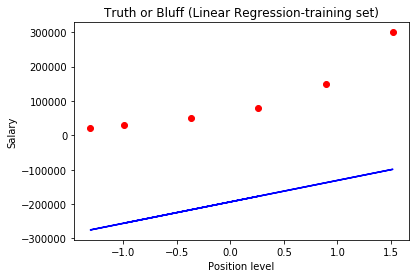

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression-training set)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results

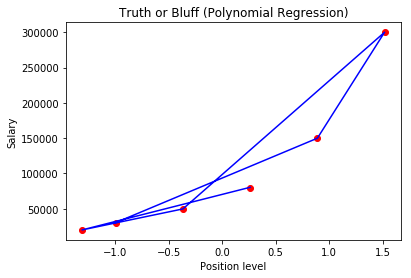

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

[-1.30855981 -1.20855981 -1.10855981 -1.00855981 -0.90855981 -0.80855981
 -0.70855981 -0.60855981 -0.50855981 -0.40855981 -0.30855981 -0.20855981
 -0.10855981 -0.00855981  0.09144019  0.19144019  0.29144019  0.39144019
  0.49144019  0.59144019  0.69144019  0.79144019  0.89144019  0.99144019
  1.09144019  1.19144019  1.29144019  1.39144019  1.49144019]
[[-1.30855981]
 [-1.20855981]
 [-1.10855981]
 [-1.00855981]
 [-0.90855981]
 [-0.80855981]
 [-0.70855981]
 [-0.60855981]
 [-0.50855981]
 [-0.40855981]
 [-0.30855981]
 [-0.20855981]
 [-0.10855981]
 [-0.00855981]
 [ 0.09144019]
 [ 0.19144019]
 [ 0.29144019]
 [ 0.39144019]
 [ 0.49144019]
 [ 0.59144019]
 [ 0.69144019]
 [ 0.79144019]
 [ 0.89144019]
 [ 0.99144019]
 [ 1.09144019]
 [ 1.19144019]
 [ 1.29144019]
 [ 1.39144019]
 [ 1.49144019]]


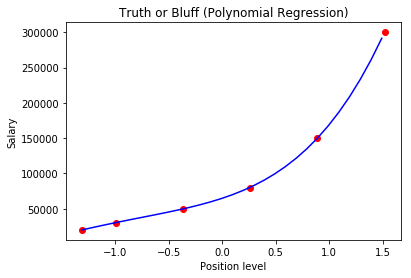

In [15]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
print(X_grid)
X_grid = X_grid.reshape((len(X_grid), 1))
print(X_grid)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [16]:
# Predicting a new result with Linear Regression
lin_reg.predict(6.5)

array([ 212083.33333333])

In [17]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([ 13709817.2332256])